In [1]:
import numpy as np

In [2]:
data = np.loadtxt('data/halbachse.txt')
display(data)

array([[0.00000000e+00, 6.83617854e+06],
       [3.47200000e-04, 6.83624203e+06],
       [6.94400000e-04, 6.83634733e+06],
       ...,
       [1.39989583e+01, 6.85351731e+06],
       [1.39993056e+01, 6.85319021e+06],
       [1.39996528e+01, 6.85282681e+06]], shape=(40320, 2))

max_period = 0.033 1/d
max_period = 46.990 min


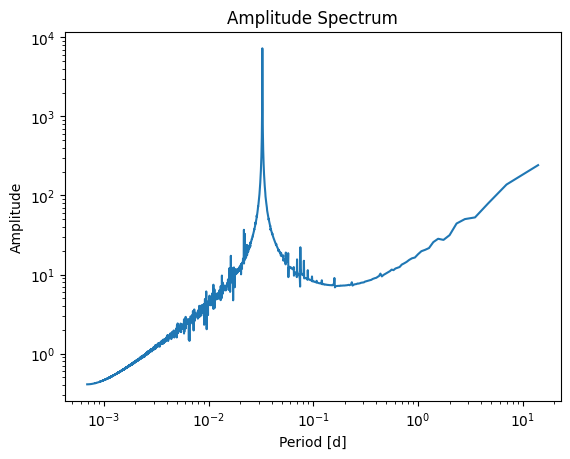

In [3]:
import nmp_util
import matplotlib.pyplot as plt
freqs, amplitudes = nmp_util.amplitude_spectrum_via_numpy(data[:,1], d = data[1][0] - data[0][0])
periods = 1/freqs[1:]
amplitudes = amplitudes[1:]
plt.title('Amplitude Spectrum')
plt.xlabel('Period [d]')
plt.ylabel('Amplitude')
plt.plot(periods, amplitudes)
plt.xscale('log')
plt.yscale('log')

max_period = periods[np.argmax(amplitudes)]
print(f'max_period = {max_period:.3f} 1/d')
print(f'max_period = {max_period*24*60:.3f} min')

In [4]:
import sympy
a_0, a_1, t, a_c, a_s, omega = sympy.symbols('a_0 a_1 t a_c a_s omega')

functional_model_expr = a_0 + a_1 * t + a_c * sympy.cos(omega * t) + a_s * sympy.sin(omega * t)

fixed_omega_expr = functional_model_expr.subs(omega, 2 * np.pi / max_period)

f_fixed = nmp_util.SympyFunctionalModel(fixed_omega_expr, [a_0, a_1, a_c, a_s], t)

In [5]:
sigma_0 = 1
f_fixed.fit(data[:,0], data[:,1])
print(f'm_0 = {f_fixed.m_0:.3f}')
f_fixed.print_parameters()

m_0 = 4690.388
a_0 = 6845837.928 ± 46.717
a_1 = -55.206 ± 5.780
a_c = -1708.469 ± 33.033
a_s = -6739.386 ± 33.035


(2.0, 4.0)

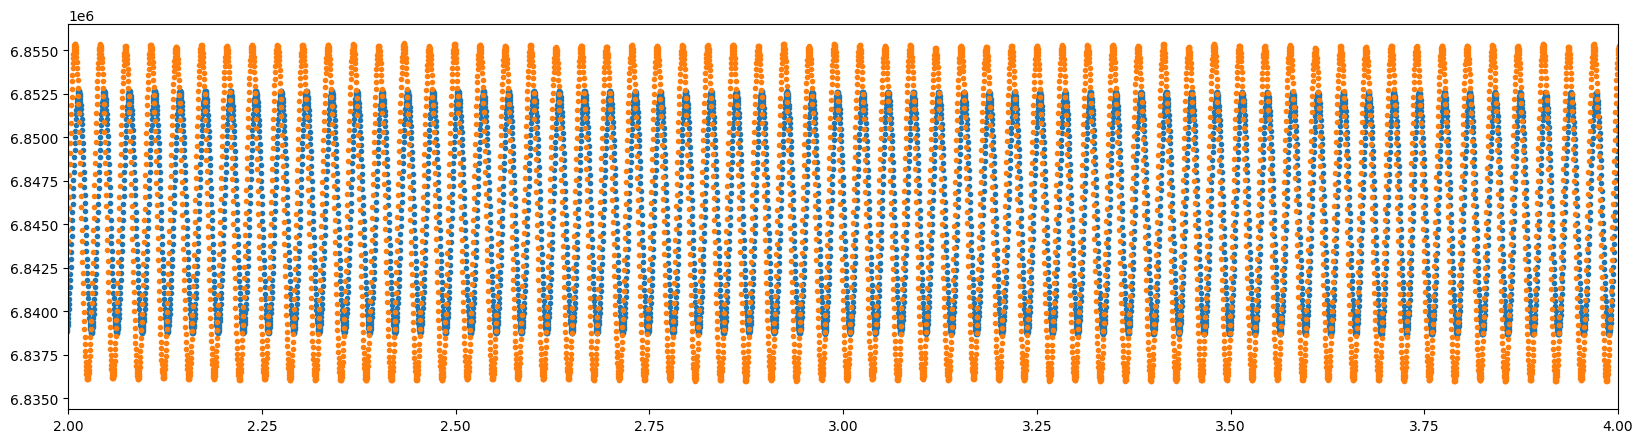

In [23]:
plt.figure(figsize=(20, 5))
f_fixed.plot_prediction(errorbar=False, kwargs={'marker' : '.'})
plt.scatter(data[:,0], data[:,1], marker = '.', label='data')
plt.xlim(2,4)

In [7]:
sigma_0 = 0.1

print(f_fixed.chi2_threshold() , f_fixed.m_0**2/sigma_0**2)

1.0116133343076512 2199974158.981541


In [17]:
amplitude_expr = sympy.sqrt(a_c**2 + a_s**2)
amplutude, amplutude_cov = nmp_util.propagate_error(amplitude_expr, f_fixed.parameter_symbols, f_fixed.parameters, f_fixed.m_0*f_fixed.parameter_cof())
print(amplutude, amplutude_cov[0][0])

6952.566974109592 0.23267106148811634


In [18]:
a_1_val = -55.206
a_1_err = 5.780
decay_after_14_days = -a_1_val * 14
decay_after_14_days_err = a_1_err * 14
print(decay_after_14_days, decay_after_14_days_err)

772.884 80.92


In [27]:
k = sympy.symbols('k')

functional_model_expr = a_0 + a_1 * t + a_c * sympy.cos(k*omega * t) + a_s * sympy.sin(k*omega * t)

with_k_expr = functional_model_expr.subs(omega, 2 * np.pi / max_period)

f_with_k = nmp_util.SympyFunctionalModel(with_k_expr, [a_0, a_1, a_c, a_s, k], t)
f_with_k.parameters = np.concat([f_fixed.parameters,[1]])  # Initial guess for k
f_with_k.fit(data[:,0], data[:,1])


(2.0, 4.0)

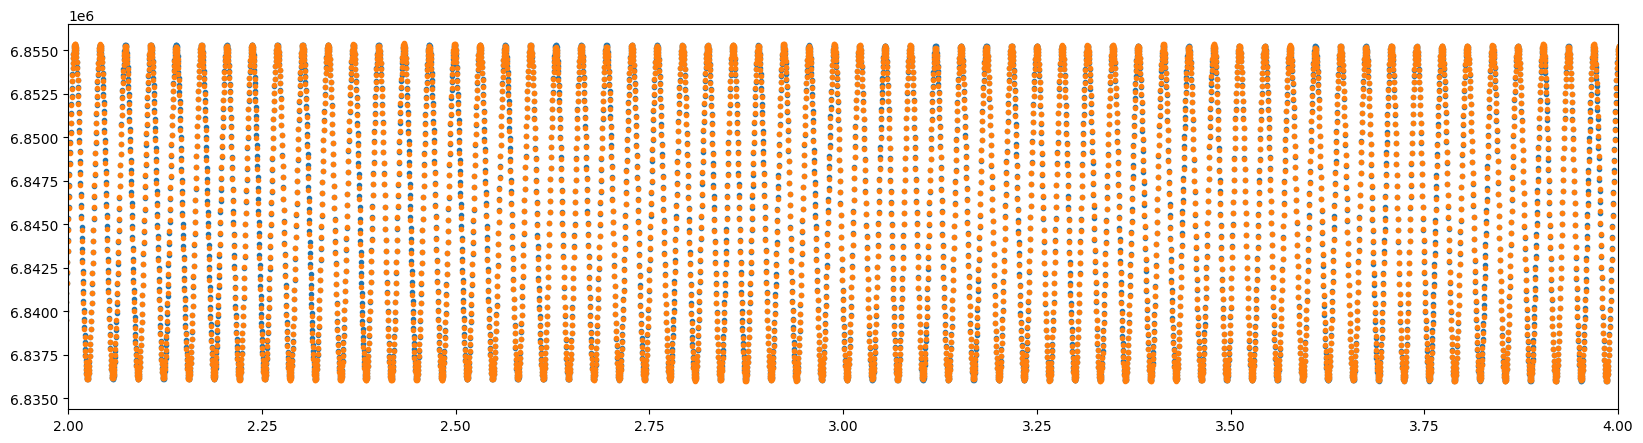

In [28]:
plt.figure(figsize=(20, 5))
f_with_k.plot_prediction(errorbar=False, kwargs={'marker' : '.'})
plt.scatter(data[:,0], data[:,1], marker = '.', label='data')
plt.xlim(2,4)

In [31]:
print(f_with_k.m_0)
f_with_k.print_parameters()
print(max_period)
print(max_period / f_with_k.parameters[-1])

130.04992089450798
a_0 = 6845827.241 ± 1.295
a_1 = -53.991 ± 0.160
a_c = -9601.646 ± 0.917
a_s = 298.304 ± 1.831
k = 0.999 ± 0.000
0.03263194405594406
0.032664610416672686
